In [1]:
import sca as sca
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
def simu_tseries(n_time,n_roi,n_clusters,alpha) :
    y = np.random.normal(size=[n_roi , n_time])
    gt = np.zeros(shape=[n_roi,n_clusters.size])
    
    for ss in range(0,n_clusters.size) :
        ind = np.linspace(0,n_roi,n_clusters[ss]+1,dtype="int")
        for cc in range(0, n_clusters[ss]) :
            cluster = range(ind[cc],ind[cc+1])
            sig = np.random.normal(size=[1,n_time])
            y[cluster,:] = y[cluster,:] + alpha * np.repeat(sig,ind[cc+1]-ind[cc],0)
            gt[cluster,ss] = cc
    return y , gt

In [9]:
n_time = 100     # number of time samples
n_roi = 200      # number of regions
n_clusters = np.array([5])   # number  of clusters 
alpha = 0.5   # this parameter controls the "strength" of the clustering.
y , gt = simu_tseries(n_time , n_roi , n_clusters , alpha )

In [10]:
t0 = time.clock()
stab_maps, dwell_time = sca.recursive_cluster(y, n_clusters=5, n_states=1, subsample_size=20, n_jobs=-1,
                                              threshold_dice=0.5, threshold_stability=0.3, n_replications=100)
print(time.clock()-t0, "seconds process time")

2.5098529999999997 seconds process time


array([[0.8 ],
       [0.71],
       [0.75],
       [0.71],
       [0.86]])

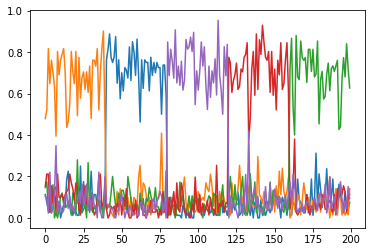

In [11]:
plt.plot(stab_maps)
dwell_time

In [ ]:
a.astype('float')[0]